https://docs.opencv.org/4.3.0/db/d27/tutorial_py_table_of_contents_feature2d.html 

https://bkshin.tistory.com/entry/OpenCV-29-%EC%98%AC%EB%B0%94%EB%A5%B8-%EB%A7%A4%EC%B9%AD%EC%A0%90-%EC%B0%BE%EA%B8%B0?category=1148027

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import cv2
import numpy as np

In [ ]:
img = cv2.imread('/content/drive/MyDrive/GACHON/2021-2/영상처리/data/house.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

cv2.KeyPoint

특징점을 나타내는 opencv의 클래스

parameter
* size: 의미있는 kp의 neighbor의 반지름

* angle: 특징점 방향(clockwise임, -1인경우 아무의미가 없음)

herris corner detector

In [ ]:
keypoints = dectector.detect(img[,mask])

In [ ]:
cv2.drawKeypoints(img.keypoint,outImage(:::-1))

In [ ]:
detector.compute(image.keypoint[,descritor])

In [ ]:
sift = cv.xfeatures2d.SIFT_create()
kp, des = sift.detectAndCompute(gray,None) #mask안줌 전체 다쓸거임

In [ ]:
import numpy as np
import cv2 as cv
img = cv.imread('home.jpg')
gray= cv.cvtColor(img,cv.COLOR_BGR2GRAY)
sift = cv.xfeatures2d.SIFT_create()
kp = sift.detect(gray,None)
img=cv.drawKeypoints(gray,kp,img)
cv.imwrite('sift_keypoints.jpg',img)

uint8


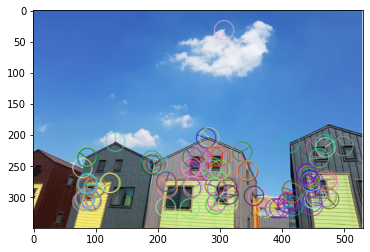

(<matplotlib.image.AxesImage at 0x7f99f45efa90>, None)

In [ ]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

#img = cv.imread('simple.jpg',0)

mask = np.ones_like(gray) #*255 #opencv bitwise기반임
mask.astype(np.uint8)
# Initiate ORB detector
orb = cv.ORB_create()

print(mask.dtype)

# find the keypoints with ORB
kp, des= orb.detectAndCompute(img,None)
kp, des  = orb.detectAndCompute(img,mask) #  image가 들어감 gray 말고
# compute the descriptors with ORB
#kp, des = orb.compute(img, kp)
# draw only keypoints location,not size and orientation
img2 = cv.drawKeypoints(img, kp, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.imshow(img2[:,:,::-1]), plt.show()

In [ ]:
type(kp)

list

In [ ]:
kp[0].pt

(307.0, 32.0)

In [ ]:
img1 = cv2.imread('/content/drive/MyDrive/GACHON/2021-2/영상처리/data/taekwonv1.jpg')
gray1 = cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)
img2 = cv2.imread('/content/drive/MyDrive/GACHON/2021-2/영상처리/data/figures.jpg')
gray2 = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)

detector =  cv.ORB_create()
kp1, des1  = orb.detectAndCompute(gray1,None)
kp2, des2  = orb.detectAndCompute(gray2,None)
print(f'# of kp1 : {len(kp1)} / # of kp2 : {len(kp2)}')


matcher = cv2.BFMatcher(cv2.NORM_HAMMING,crossCheck=False)

#matches = matcher.match(desc1,desc2)
matches = matcher.knnMatch(des1,des2,2)

ratio = 0.75
good_matches = [first for first, second in matches 
                if first.distance < second.distance * ratio]


print('matches:%d/%d' %(len(good_matches),len(matches)))
res = cv2.drawMatches(img1, kp1, img2, kp2, good_matches,None,
                      flags = cv2.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS)

#plt.figure(figsize=(2*7,2*28))
#plt.imshow(res[...,::-1])

# of kp1 : 500 / # of kp2 : 500
matches:27/500


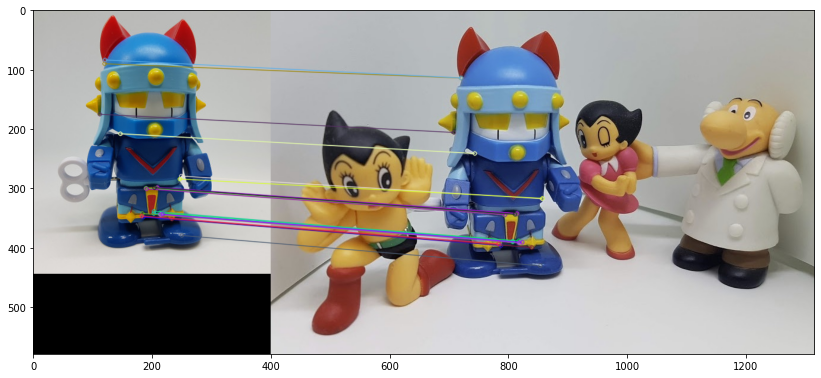

In [ ]:
plt.figure(figsize=(2*7,2*28))
plt.imshow(res[...,::-1])